# 03. 量子门

## 幺正变换

先前提到量子态是一个（列）向量 $|\psi\rangle$（ket），并且其振幅的平方就是概率。与之对应的则是（行）向量 $\langle \psi|$（bra），

$$
|\psi \rangle = \alpha |0\rangle + \beta |1 \rangle \to \langle \psi| \equiv \alpha^* \langle 0 | + \beta^* \langle 1|
$$

内积则称为 “bracket”

$$
\langle \psi| \psi \rangle = |\alpha|^2+|\beta|^2=1
$$

这也被称为归一化条件。

所以，若量子态是一个向量，则改变量子态的操作必须是一个矩阵（基于线性代数）。
$$
|\psi\rangle \to U|\psi\rangle
$$
在对偶空间则表示为
$$
\langle\psi|\to \langle\psi|U^\dagger
$$
其中$A^\dagger \equiv (A^T)^*$。

为了保证概率守恒，我们需要
$$
\langle \psi|\psi\rangle = \langle \psi|U^\dagger U|\psi\rangle = 1
$$
对于所有可能的 $|\psi\rangle$ 都成立。这就意味着
$$
U^\dagger U = I \Rightarrow U^\dagger = U^{-1}
$$
这正是幺正矩阵的定义。

### 总结性回顾

- 任何对量子态的改变都可以用一个矩阵来表示。
- 由于概率守恒，该矩阵必须保证幺正性。
- 换句话说，任何量子计算的量子动力学行为都必须是一种幺正变换（的子集）。

### 作为幺正变换的量子计算？

接下来，我们可以想象量子计算是由一类幺正变换来表示，例如
$$
U|\psi_{in}\rangle=|\psi_{out}\rangle
$$

传统上，物理学家以这种方式解决问题：已知初态和哈密顿量，寻找末态。但对于量子计算，通常我们已知初态与末态，而目标是找到量子线路$U$（量子算法）。

与经典计算相比较：
$$
f(x_{in}）=y_{out}
$$
我们稍后会表明量子计算是更加普适的，这意味着我们也可以用量子计算机完成经典计算任务。问题的关键是一旦定义好输入与输出之间的逻辑关系，我们需要知道如何在物理上实现其对应的幺正变换（称为量子电路）。回想一下，经典电路由基本的逻辑运算组成（AND, OR, NOT, NAND等），量子电路同样应该由基本逻辑运算组成，它们是什么？（我们会在之后发现）

#### 术语

- 量子线路：实现量子算法的一种方式（更大的幺正矩阵）
- 量子门：量子电路的元素（较小的幺正矩阵）
- 算符：矩阵（不一定幺正）

## 泡利 `X` 门

**单量子比特门** $\equiv$ **单量子比特幺正矩阵（变换）**

在经典计算机中，**非门**的效果如下：
$$
Logical \enspace NOT \enspace gate: \enspace 1 \to 0 \enspace and \enspace 0 \to 1
$$
而现在我们想要一个量子版本的非门：
$$
Quantum \enspace NOT \enspace gate: \enspace |1\rangle \to |0\rangle \enspace and \enspace |0\rangle \to |1\rangle
$$
这也被称为**比特翻转**。

使用泡利 `X` 门就可以做到上述操作
$$
\sigma_x \equiv U_X \equiv X = |1\rangle\langle 0| + |0\rangle\langle 1|= \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
$$

可以验证泡利 `X` 门是幺正矩阵：
$$
X^\dagger X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} = I
$$

用狄拉克符号可以容易的验证：

$$
X|1\rangle = (|1\rangle\langle 0|+|0\rangle\langle 1|)|1\rangle = |1\rangle\langle 0|1\rangle + |0\rangle\langle 1|1\rangle = |0\rangle
$$

$$
X|0\rangle = (|1\rangle\langle 0|+|0\rangle\langle 1|)|0\rangle = |1\rangle\langle 0|0\rangle + |0\rangle\langle 1|0\rangle = |1\rangle
$$

对于一个任意的量子态，泡利 `X` 门的效果如下：
$$
X|\psi\rangle=X(\alpha|0\rangle+\beta|1\rangle)=\alpha X|0\rangle+\beta X|1\rangle = \alpha |1\rangle+\beta |0\rangle
$$

$$
X\begin{pmatrix}\alpha \\ \beta \end{pmatrix} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix}\alpha \\ \beta \end{pmatrix} = \begin{pmatrix}\beta \\ \alpha \end{pmatrix}
$$

## 量子线路

一个量子线路（非常大的幺正变换）包括一系列的门（小一些的幺正变换），其中每一条线代表一个量子比特，从左往右依次作用每个门（矩阵乘法作用顺序是从右到左）。

例如：$AB|\psi\rangle$ 表示先作用 $B$ 再作用 $A$。

量子线路是非循环的，线路中不存在环；量子线路是可逆的（经典线路通常不可逆）。

现在我们可以尝试在MindQuantum中搭建一个简单的量子电路——对一个量子比特作用泡利 `X` 门。首先创建一个量子电路：

In [1]:
from mindquantum.core.circuit import Circuit

circ = Circuit()
quantum_state = circ.get_qs(ket=True)
print(quantum_state)

1¦0⟩


可以看到电路的初始量子态处于 $|0\rangle$ 态，现在我们作用泡利 `X` 门，然后打印电路量子态：

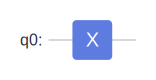

In [2]:
from mindquantum.core.gates import X

circ += X.on(0) #对第0个比特作用X门
# print(circ)     #打印线路
circ.svg()

In [3]:
new_state = circ.get_qs(ket=True)
print(new_state)

1¦1⟩


可以看到，对 $q_0$ 作用泡利 `X` 门后，量子态变为 $|1\rangle$ 态。

> API 解释：
> 
> - [mindquantum.core.circuit](https://www.mindspore.cn/mindquantum/docs/zh-CN/master/mindquantum.core.circuit.html) 里面包含了量子线路相关的 API；
> - [mindquantum.core.gates](https://www.mindspore.cn/mindquantum/docs/zh-CN/master/mindquantum.core.gates.html) 里面包含了量子门相关的 API；
> - `circ = Circuit()` 定义一个名为 `circ` 的量子线路，初始为空；
> - 向量子线路中添加量子门的方法有几种：
>   - `circ += X.on(0)`：添加一个作用在 `q0` 上的 X 门；
>   - `circ.x(0)`：添加一个作用在 `q0` 上的 X 门；
>   - `circ.append(X.on(0))`：添加一个作用在 `q0` 上的 X 门；
>   - `circ += Circuit([X.on(0), X.on(1)])`：在 `circ` 后面拼接一个新的量子线路；
>   - `circ.extend([X.on(0), X.on(1)]`：在 `circ` 后面按找 `list` 的顺序添加量子门

下面的代码演示了 MindQuantum 中对量子线路添加量子门的几种方法：

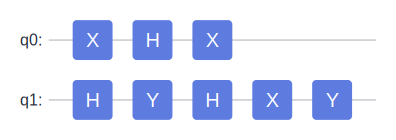

In [4]:
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import X, Y, H 

circ = Circuit()
circ += X.on(0)
circ.h(0).h(1)
circ.append(Y.on(1))
circ += Circuit([X.on(0), H.on(1)])
circ.extend([X.on(1), Y.on(1)])
circ.svg()

In [5]:
from show_info import InfoTable

InfoTable('mindquantum')